In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Input, regularization
import cv2
import numpy as np
import matplotlib.pyplot as plt

2023-03-12 08:48:29.329908: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = Sequential()
model.add(Input(shape=(224, 224, 1), name='input'))

# Convolutional layer - 1 (32 filters, 3x3 kernel, relu activation)
model.add(Conv2D(filters=32, kernel_size=(3, 3),
          padding='same', name='conv2d_1', activation='relu'))
model.add(BatchNormalization(name='batch_norm_1'))

model.add(Conv2D(filters=32, kernel_size=(3, 3),
          padding='same', name='conv2d_2', activation='relu'))
model.add(BatchNormalization(name='batch_norm_2'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer - 2 (64 filters, 3x3 kernel, relu activation)
model.add(Conv2D(filters=64, kernel_size=(3, 3),
          padding='same', name='conv2d_3', activation='relu'))
model.add(BatchNormalization(name='batch_norm_3'))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
          padding='same', name='conv2d_4', activation='relu'))
model.add(BatchNormalization(name='batch_norm_4'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer - 3 (128 filters, 3x3 kernel, relu activation)
model.add(Conv2D(filters=128, kernel_size=(3, 3),
          padding='same', name='conv2d_5', activation='relu'))
model.add(BatchNormalization(name='batch_norm_5'))

model.add(Conv2D(filters=128, kernel_size=(3, 3),
          padding='same', name='conv2d_6', activation='relu'))
model.add(BatchNormalization(name='batch_norm_6'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer - 4 (256 filters, 3x3 kernel, relu activation)
model.add(Conv2D(filters=256, kernel_size=(3, 3),
          padding='same', name='conv2d_7', activation='relu'))
model.add(BatchNormalization(name='batch_norm_7'))

model.add(Conv2D(filters=256, kernel_size=(3, 3),
          padding='same', name='conv2d_8', activation='relu'))
model.add(BatchNormalization(name='batch_norm_8'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Dense layer - 1 (512 neurons, relu activation)
model.add(Dense(512, activation='relu', name='dense_1'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', name='dense_2'))
model.add(Dropout(0.5))

# Dense layer - output (3 neurons, softmax activation)
model.add(Dense(3, activation='relu', name='dense_3'))


2023-03-12 08:48:57.607846: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4610 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 SUPER, pci bus id: 0000:06:00.0, compute capability: 7.5


In [59]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 batch_norm_1 (BatchNormaliz  (None, 224, 224, 32)     128       
 ation)                                                          
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_norm_2 (BatchNormaliz  (None, 224, 224, 32)     128       
 ation)                                                          
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                     

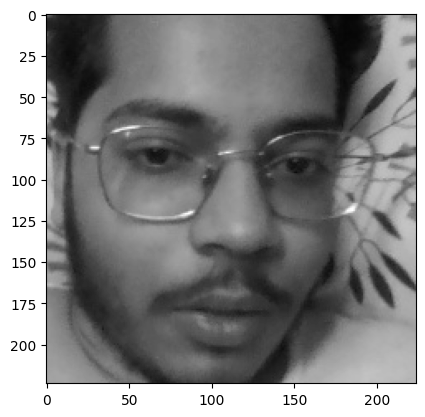

In [4]:
img = cv2.imread('data/devasheesh_0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img/255.0
plt.imshow(img, cmap='gray')
plt.show()

In [57]:
out = model.predict(img.reshape(1, 224, 224, 1))
print(out)

# display the output of the first convolutional layer
# for i in range(64):
#     plt.subplot(4, 16, i+1)
#     plt.imshow(out[0, :, :, i], cmap='gray')
#     plt.axis('off')

1/1 [==============================] - 0s 12ms/step
[[0. 0. 0.]]


In [38]:
img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
img_tensor.shape

TensorShape([224, 224])

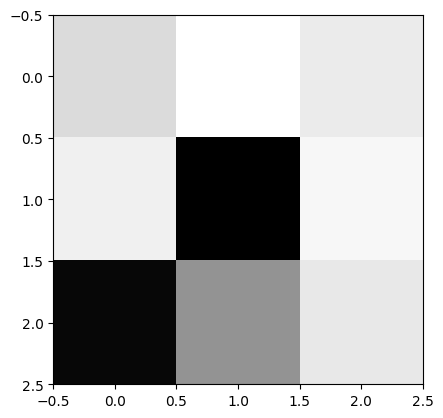

In [14]:
# filter_weights = model.get_layer('conv1').get_weights()
# plt.imshow(filter_weights[0][:, :, :, 0], cmap='gray')